In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# Load dataset

In [2]:
df_telco_encoded = pd.read_csv('data/telco_customer_churn_encoded.csv', header=0)

# Decision Tree

In [3]:
y = df_telco_encoded['Churn']
X = df_telco_encoded.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize decision tree classifier
dtree = DecisionTreeClassifier()

# Fit the decision tree on training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
# Predict churn labels on testing data
y_pred = dtree.predict(X_test)

### Evaluation

In [6]:
# Calculate accuracy score on testing data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print test accuracy
print('Accuracy:', round(accuracy, 2))
print('Precision:', round(precision, 2))
print('Recall:', round(recall, 2))

Accuracy: 0.72
Precision: 0.47
Recall: 0.47


In [7]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[840 196]
 [196 177]]


In [8]:
from sklearn.metrics import classification_report

# Display the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.47      0.47      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



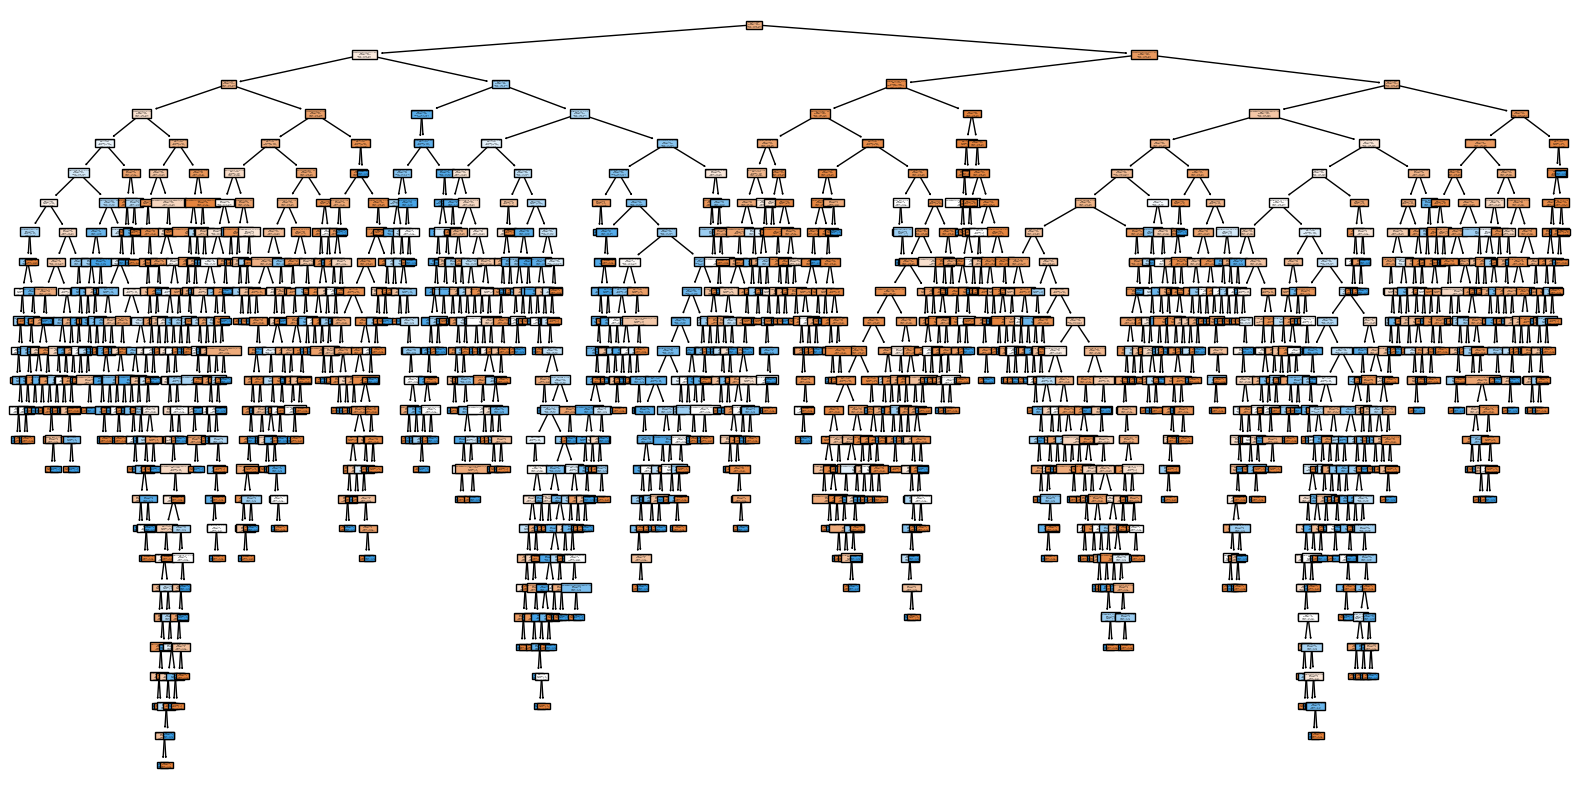

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.show()